In [36]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [23]:
import csv
import os
from datetime import datetime

import numpy as np

In [24]:
N = ord("B") % 3 + 1
print("Variant #" + str(N))

Variant #1


In [25]:
def get_csv_column(file, name):
    if not os.path.exists(file):
        raise FileNotFoundError(f"The file '{file}' does not exist.")

    with open(file, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)

        if name not in header:
            raise ValueError(f"The column '{name}' does not exist in the CSV file.")

        index = header.index(name)
        return np.array([int(row[index]) if row[index] else 0 for row in reader])

In [26]:
def parse_dates(file):
    with open(file, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)
        date_idx = header.index('date')
        return [datetime.strptime(row[date_idx], '%Y-%m-%d') for row in reader]

In [27]:
def daily_loses():
    return np.abs(np.diff(aircraft_losses, prepend=aircraft_losses[0]))

In [28]:
def top_losses(top=3):
    return np.sort(daily_losses)[-top:][::-1]

In [29]:
def losses_in_period(start, end):
    indices = [i for i, date in enumerate(dates) if start <= date <= end]
    losses = daily_losses[indices]
    return np.sum(losses)

In [30]:
def mean_losses_in_period(start, end):
    indices = [i for i, date in enumerate(dates) if start <= date <= end]
    losses = daily_losses[indices]
    if len(losses) == 0:
        return 0
    return np.mean(losses)

In [44]:
file_path = './2022 Russia Ukraine War/russia_losses_equipment.csv'
dates = parse_dates(file_path)
aircraft_losses = get_csv_column(file_path, 'aircraft')

daily_losses = daily_loses()
formatted_dates = np.array([date.strftime('%Y-%m-%d') for date in dates])
non_zero_losses = daily_losses[daily_losses != 0]
filtered_dates = formatted_dates[daily_losses != 0]

output = np.char.add(filtered_dates, ': ')
output = np.char.add(output, non_zero_losses.astype(str))

print("Добові втрати літаків:")
print('\n'.join(output))

top_3_losses = top_losses()
print(f"Три найбільші добові втрати літаків: {top_3_losses}")

total_summer_losses = losses_in_period(datetime(2022, 6, 1), datetime(2022, 8, 31))
print(f"Кількість літаків, збитих влітку 2022 року: {total_summer_losses}")

if len(dates) < 300:
    mean_last_300_days = np.mean(daily_losses)
else:
    mean_last_300_days = mean_losses_in_period(dates[-1], dates[-300])

print(f"Середнє значення втрат авіації за останні 300 днів: {mean_last_300_days}")

Добові втрати літаків:
2024-10-06: 0
2024-10-05: 0
2024-10-04: 0
2024-10-03: 0
2024-10-01: 0
2024-09-30: 0
2024-09-29: 0
2024-09-28: 0
2024-09-27: 0
2024-09-26: 0
2024-09-25: 0
2024-09-24: 0
2024-09-23: 0
2024-09-22: 0
2024-09-21: 0
2024-09-20: 0
2024-09-19: 0
2024-09-18: 0
2024-09-17: 0
2024-09-16: 0
2024-09-15: 0
2024-09-14: 0
2024-09-13: 0
2024-09-12: 0
2024-09-10: 0
2024-09-09: 0
2024-09-08: 0
2024-09-07: 0
2024-09-06: 0
2024-09-05: 0
2024-09-04: 0
2024-09-03: 0
2024-09-02: 0
2024-09-01: 0
2024-08-31: 0
2024-08-30: 0
2024-08-29: 0
2024-08-28: 0
2024-08-26: 0
2024-08-25: 0
2024-08-24: 0
2024-08-23: 0
2024-08-22: 0
2024-08-21: 0
2024-08-20: 0
2024-08-19: 0
2024-08-18: 0
2024-08-17: 0
2024-08-16: 0
2024-08-15: 0
2024-08-13: 0
2024-08-12: 0
2024-08-11: 0
2024-08-10: 0
2024-08-09: 0
2024-08-08: 0
2024-08-06: 0
2024-08-05: 0
2024-08-03: 0
2024-08-02: 0
2024-08-01: 0
2024-07-31: 0
2024-07-30: 0
2024-07-29: 0
2024-07-28: 0
2024-07-27: 0
2024-07-26: 0
2024-07-25: 0
2024-07-24: 0
2024-07-22:

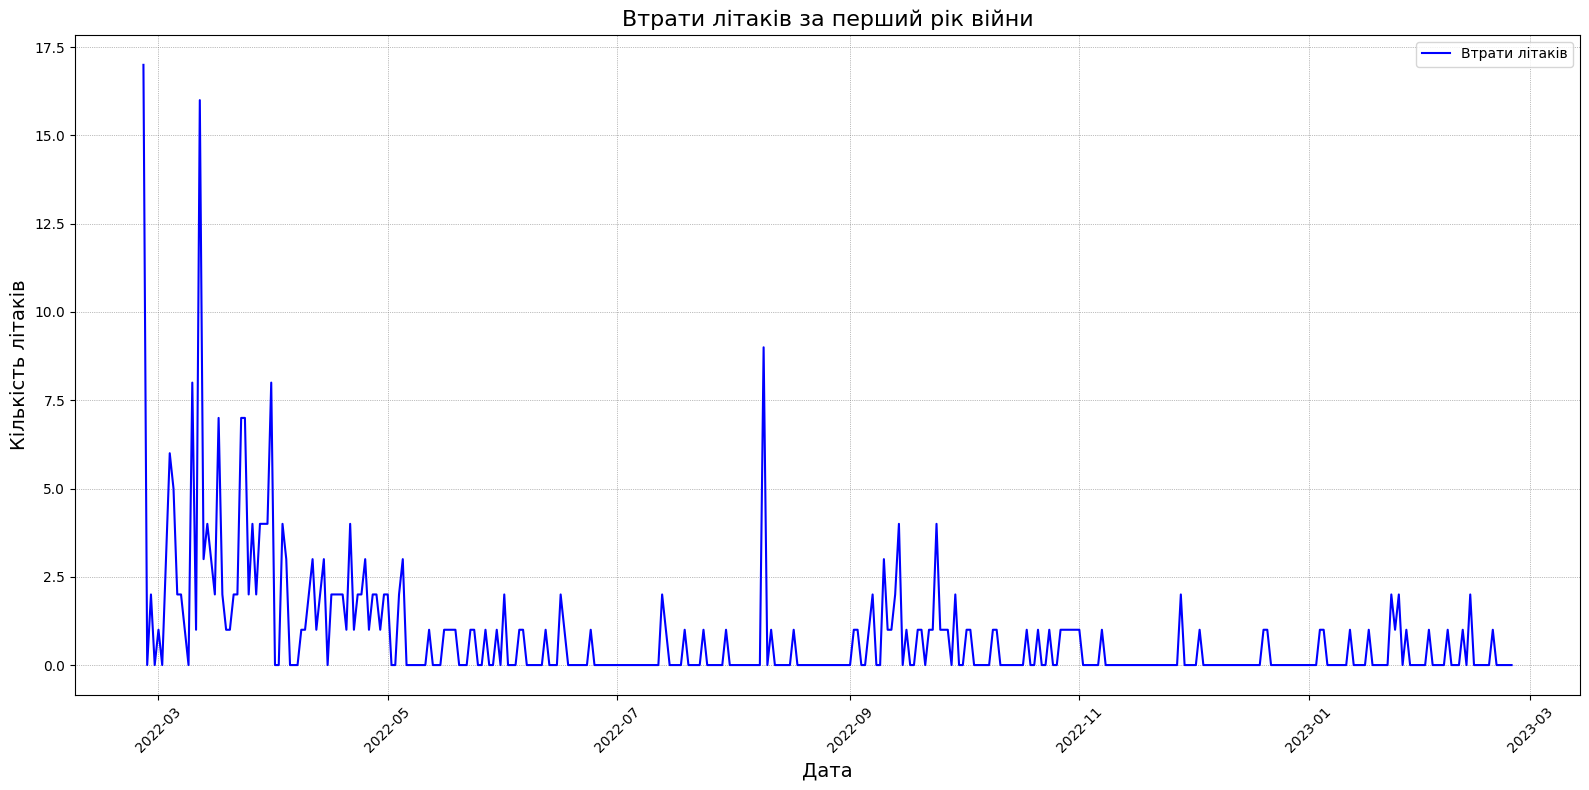

In [40]:
import matplotlib.pyplot as plt

start_date = min(dates)
end_date = start_date.replace(year=start_date.year + 1)

year_indices = np.array([i for i, date in enumerate(dates) if start_date <= date < end_date])
year_losses = daily_losses[year_indices]
year_dates = np.array(dates)[year_indices]

plt.figure(figsize=(16, 8), dpi=100)

plt.plot(year_dates, year_losses, linestyle='-', color='b', label='Втрати літаків')

plt.title('Втрати літаків за перший рік війни', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Кількість літаків', fontsize=14)
plt.legend()
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('aircraft_losses_first_year.png', format='png')

plt.show()
